## Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.callbacks import ModelCheckpoint


import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 5)
import PIL.Image

## Checking TF version

In [2]:
tf.version

<module 'tensorflow._api.v2.version' from '/home/h/anaconda3/lib/python3.7/site-packages/tensorflow/_api/v2/version/__init__.py'>

## Import data

In [3]:
# load images and check statistical distribution
x_images = np.load('1260_2256_compressed_X.npy/X.npy')
print('x_images.shape =', x_images.shape)
print('x_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images.min(),x_images.mean(), x_images.std(), x_images.max()))

y_labels = np.load('datasets_1260_2256_Y.npy')
print('y_labels.shape =', y_labels.shape)
print('y_labels.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_labels.min(),y_labels.mean(), y_labels.std(), y_labels.max()))

#Checking picture distribution
imgs_0 = x_images[y_labels == 0] # 0 = no cancer
print("No cancer images:"+str(len(imgs_0 )))
imgs_1 = x_images[y_labels == 1] # 1 = cancer
print("Cancer images:"+str(len(imgs_1)))

x_images.shape = (5547, 50, 50, 3)
x_images.min/mean/std/max = 2.00/185.03/47.25/255.00
y_labels.shape = (5547,)
y_labels.min/mean/std/max = 0.00/0.50/0.50/1.00
No cancer images:2759
Cancer images:2788


## Preprocess Data

In [4]:
# Normalize pixel values to be between 0 and 1
x_images = x_images / 255.0
print("Pixel normalized")

Pixel normalized


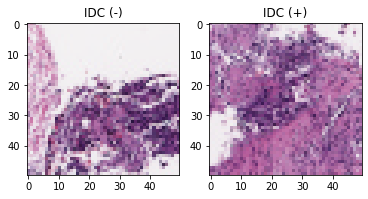

In [5]:
def plotOne(a,b):
    """
    Plot one numpy array
    """
    plt.subplot(1,2,1) #subplot(nrows, ncols, index)
    plt.title('IDC (-)')
    plt.imshow(a[100])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(b[100])
plotOne(imgs_0, imgs_1) 

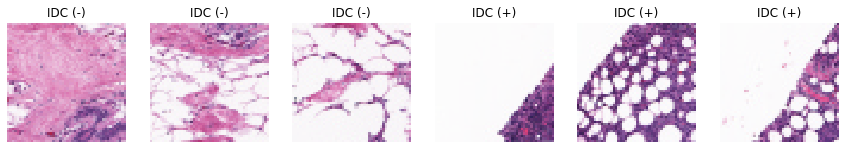

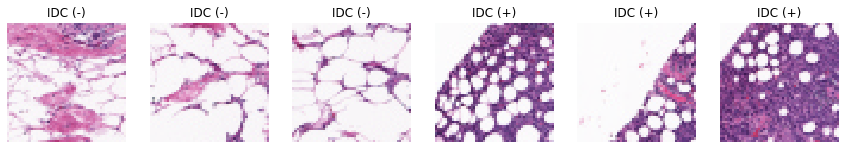

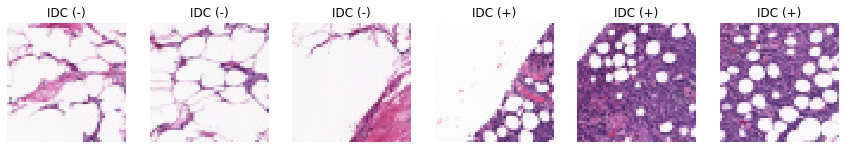

In [6]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):               #create 3 rows with 3 col and fill with images
        plt.figure(figsize=(20, 10)) 
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC (-)')
            plt.imshow(a[row+col]) #Getting different picture each iteration
            plt.axis('off')       
            plt.subplot(1,8,col+4) # To stand next to the first loop
            plt.title('IDC (+)')
            plt.imshow(b[row+col])
            plt.axis('off')
plotTwo(imgs_0, imgs_1) 

## Exemples of data augmentation possibilities

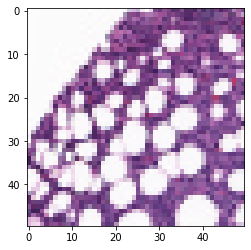

In [7]:
#Choosing image to be augmented
plt.imshow(imgs_1[1])

In [8]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image 1')
  plt.imshow(original)

   
  plt.subplot(1,2,2)
  plt.title('Augmented image 1')
  plt.imshow(augmented)


## Flipping 

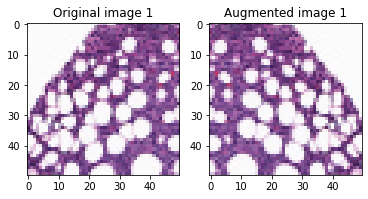

In [9]:
flipped = tf.image.flip_left_right(imgs_1[1])
visualize(imgs_1[1], flipped)

## Grayscale

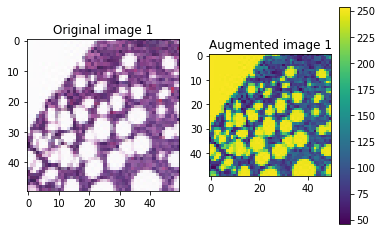

In [10]:
grayscaled = tf.image.rgb_to_grayscale(imgs_1[1])
visualize(imgs_1[1], tf.squeeze(grayscaled))
plt.colorbar()

## Saturate

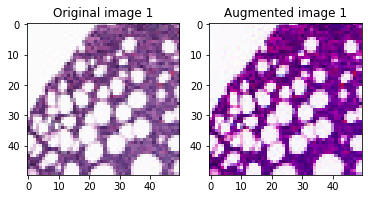

In [11]:
saturated = tf.image.adjust_saturation(imgs_1[1], 3)
visualize(imgs_1[1], saturated)

## Brightness

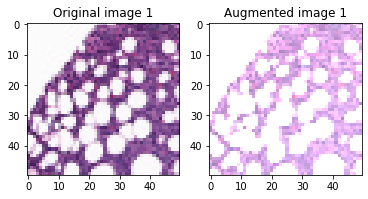

In [12]:
bright = tf.image.adjust_brightness(imgs_1[1], 0.4)
visualize(imgs_1[1], bright)

## Rotate

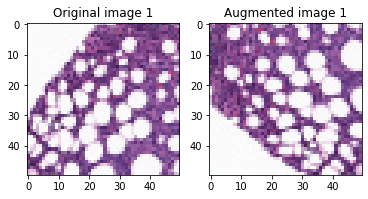

In [13]:
rotated = tf.image.rot90(imgs_1[1])
visualize(imgs_1[1], rotated)

## Center crop

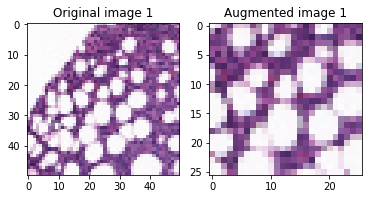

In [14]:
cropped = tf.image.central_crop(imgs_1[1], central_fraction=0.5)
visualize(imgs_1[1],cropped)

## Splitting dataset 80-20 for training & testing

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x_images, y_labels, test_size=0.2)
print("Training Data Shape:", X_train.shape, Y_train.shape)
print("Testing Data Shape:", X_test.shape, Y_test.shape)

Training Data Shape: (4437, 50, 50, 3) (4437,)
Testing Data Shape: (1110, 50, 50, 3) (1110,)


(50, 50, 3)


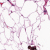

In [16]:
#Checking shape & image with TF
print(X_train[0].shape)
array_to_img(X_train[0])

## Designing simple CNN model

In [17]:
input_shape = (50,50,3) # Giving image size for NN as input

In [25]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)        

## Generate Data

In [27]:
train_datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=50,  # randomly rotate images by 50 degree
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally / vertically
        vertical_flip=False,
         zoom_range=0.3, #randomly zoom the image on a 0.3 factore
    shear_range=0.2, #apply shear based transformation
fill_mode='nearest')  # randomly flip images)

val_datagen = ImageDataGenerator(rescale=1./255)

#Generate augmented dataset
train_generator = train_datagen.flow(X_train, Y_train, batch_size=30) #Create 30 images



## Visualise augmented datas

Labels: [0, 0, 0, 0, 0]


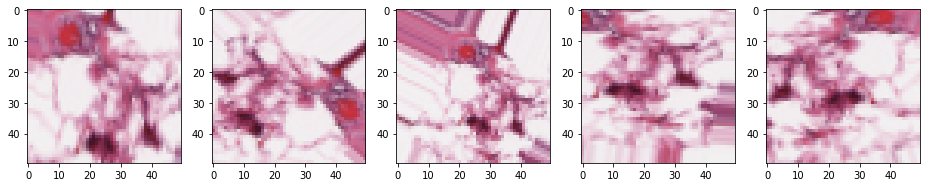

In [28]:
img_id = 100
image_generator = train_datagen.flow(X_train[img_id:img_id+1], Y_train[img_id:img_id+1],
                                   batch_size=1)
image = [next(image_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in image])
l = [ax[i].imshow(image[i][0][0]) for i in range(0,5)]

In [29]:
#checkpoint save best model based on minimal loss
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [30]:

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #reduce default learning rate by 10 here to prevent the model from getting stuck in a local minima or overfit
              metrics=['accuracy'])


history = model.fit(train_generator, steps_per_epoch=len(X_train) / 32, epochs=12,callbacks=[checkpoint], validation_data = (X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('accuracy:', score[1],'\n')

Epoch 1/12
139/138 [==============================] - 13s 91ms/step - loss: 0.7731 - accuracy: 0.4755 - val_loss: 0.6655 - val_accuracy: 0.6234
Epoch 2/12
139/138 [==============================] - 13s 90ms/step - loss: 0.6682 - accuracy: 0.6199 - val_loss: 0.5943 - val_accuracy: 0.7225
Epoch 3/12
139/138 [==============================] - 10s 73ms/step - loss: 0.6607 - accuracy: 0.6439 - val_loss: 0.6376 - val_accuracy: 0.6189
Epoch 4/12
139/138 [==============================] - 10s 73ms/step - loss: 0.6557 - accuracy: 0.6693 - val_loss: 0.6020 - val_accuracy: 0.6748
Epoch 5/12
139/138 [==============================] - 11s 77ms/step - loss: 0.6295 - accuracy: 0.6755 - val_loss: 0.5748 - val_accuracy: 0.7135
Epoch 6/12
139/138 [==============================] - 9s 68ms/step - loss: 0.6435 - accuracy: 0.6652 - val_loss: 0.5838 - val_accuracy: 0.7216
Epoch 7/12
139/138 [==============================] - 10s 71ms/step - loss: 0.6370 - accuracy: 0.6717 - val_loss: 0.5818 - val_accuracy: 

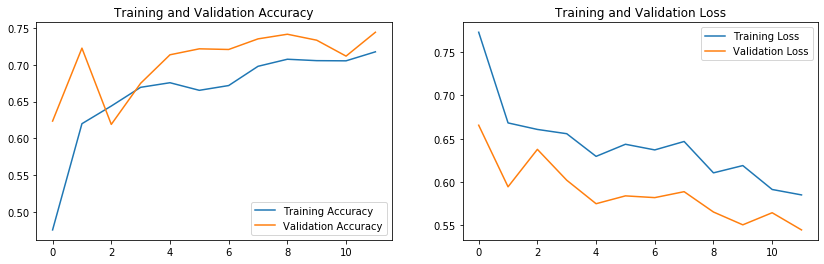

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()